# Statistics Notebook

This notebook demonstrates the practical application of the statistical module by analyzing a custom CSV file to perform a comprehensive statistical analysis. Leveraging auxiliary libraries such as Matplotlib, Pandas, and NumPy, the primary goal of this section is to showcase the functionality of the scientific module while enhancing its performance and usability.

In [1]:
# Import Libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

modules_dir = os.path.abspath("../modules/")  
sys.path.append(modules_dir)

from scientific_module import Statistics
from scientific_module import CSV_Parser 

In [2]:
# read data from the class method
csv_students = "../datasets/Cleaned_Students_Performance.csv"
data = Statistics.from_csv(csv_students)

In [3]:
# Conserve in student_dataset_complete all the information for backup (as list of rows)
headers = data.get_headers()
temp_dataset = []

for head in headers:
    temp_dataset += [data[head]]

students_dataset_complete = [headers] + [list(column) for column in zip(*temp_dataset)] 
print(students_dataset_complete)

[['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total_score', 'average_score'], [0.0, 'group_B', "bachelor's_degree", 1.0, 0.0, 72.0, 72.0, 74.0, 218.0, 72.66666666666667], [0.0, 'group_C', 'some_college', 1.0, 1.0, 69.0, 90.0, 88.0, 247.0, 82.33333333333333], [0.0, 'group_B', "master's_degree", 1.0, 0.0, 90.0, 95.0, 93.0, 278.0, 92.66666666666667], [1.0, 'group_A', "associate's_degree", 0.0, 0.0, 47.0, 57.0, 44.0, 148.0, 49.333333333333336], [1.0, 'group_C', 'some_college', 1.0, 0.0, 76.0, 78.0, 75.0, 229.0, 76.33333333333333], [0.0, 'group_B', "associate's_degree", 1.0, 0.0, 71.0, 83.0, 78.0, 232.0, 77.33333333333333], [0.0, 'group_B', 'some_college', 1.0, 1.0, 88.0, 95.0, 92.0, 275.0, 91.66666666666667], [1.0, 'group_B', 'some_college', 0.0, 0.0, 40.0, 43.0, 39.0, 122.0, 40.666666666666664], [1.0, 'group_D', 'high_school', 0.0, 1.0, 64.0, 64.0, 67.0, 195.0, 65.0], [0.0, 'group_B', 'high

## Initial exploration

### Main statistics

Let's obtain the descriptive statistics on the quantitative variables in the dataset.

In [4]:
# Extract numerical data
math_scores = data['math_score']
reading_scores = data['reading_score']
writing_scores = data['writing_score']
total_scores = data['total_score']

# Overall statistics
print("Overall Statistics:")
print(f"Math Scores - Mean: {Statistics.calculate_mean(math_scores):.2f}, Median: {Statistics.calculate_median(math_scores):.2f}, Min: {Statistics.min_value(math_scores)}, Max: {Statistics.max_value(math_scores)}, Std: {Statistics.calculate_sd(math_scores):.2f}")
print(f"Reading Scores - Mean: {Statistics.calculate_mean(reading_scores):.2f}, Median: {Statistics.calculate_median(reading_scores):.2f}, Min: {Statistics.min_value(reading_scores)}, Max: {Statistics.max_value(reading_scores)}, Std: {Statistics.calculate_sd(reading_scores):.2f}")
print(f"Writing Scores - Mean: {Statistics.calculate_mean(writing_scores):.2f}, Median: {Statistics.calculate_median(writing_scores):.2f}, Min: {Statistics.min_value(writing_scores)}, Max: {Statistics.max_value(writing_scores)}, Std: {Statistics.calculate_sd(writing_scores):.2f}")
print(f"Total Scores - Mean: {Statistics.calculate_mean(total_scores):.2f}, Median: {Statistics.calculate_median(total_scores):.2f}, Min: {Statistics.min_value(total_scores)}, Max: {Statistics.max_value(total_scores)}, Std: {Statistics.calculate_sd(total_scores):.2f}\n")


Overall Statistics:
Math Scores - Mean: 66.09, Median: 66.00, Min: 0.0, Max: 100.0, Std: 15.16
Reading Scores - Mean: 69.17, Median: 70.00, Min: 17.0, Max: 100.0, Std: 14.60
Writing Scores - Mean: 68.05, Median: 69.00, Min: 10.0, Max: 100.0, Std: 15.20
Total Scores - Mean: 203.31, Median: 205.00, Min: 27.0, Max: 300.0, Std: 42.77



### Grouped Analysis, total score by race_ethnicity

In [5]:
unique_race_groups = np.unique(data['race_ethnicity'])
race_ethnicity = data['race_ethnicity']
group_dict = Statistics.frequency_count(race_ethnicity)

count_dict = {group: 0 for group in unique_race_groups}

for index, row in enumerate(race_ethnicity):
    count_dict[row] += total_scores[index]

print("Average Total Score by Race/Ethnicity:")
for key, value in group_dict.items():
    average_score = count_dict[key] / value
    print(f"{key}: {average_score:.2f}")


Average Total Score by Race/Ethnicity:
group_E: 218.26
group_D: 207.54
group_A: 188.98
group_C: 201.39
group_B: 196.41


In [6]:
# Function to calculate percentages in dict format
def calculate_percentages(column) -> dict:
    dict_column = Statistics.frequency_count(column)
    total_count = sum([value for value in dict_column.values()])
    dict_result = {}
    for key,value in dict_column.items():
        dict_result[key] = value/total_count
    return dict_result

### Pie Chart of Percentage of Population by Race

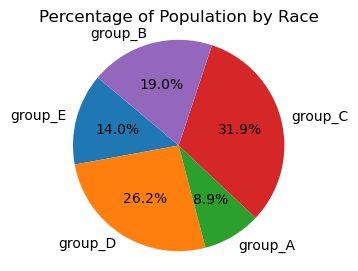

In [7]:
percentages_race = calculate_percentages(race_ethnicity)

labels = percentages_race.keys()
sizes = percentages_race.values()

plt.figure(figsize=(3, 3))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  
    startangle=140,     
    colors=plt.cm.tab10.colors  
)
plt.title("Percentage of Population by Race")
plt.axis('equal')  
plt.show()


### Pie Chart of Percentage of Population by Gender

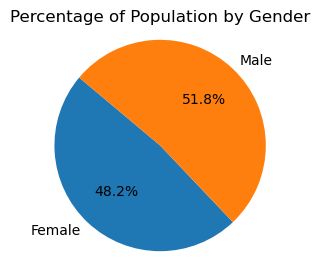

In [8]:
gender = data["gender"]
gender_percentages = calculate_percentages(gender)

gender_labels = ["Female", "Male"] # Assuming 0 = Male, 1 = Female
sizes = gender_percentages.values()

plt.figure(figsize=(3, 3))
plt.pie(
    sizes,
    labels=gender_labels,
    autopct='%1.1f%%',  
    startangle=140,     
    colors=plt.cm.tab10.colors  
)
plt.title("Percentage of Population by Gender")
plt.axis('equal')  
plt.show()

### Pie Chart of Percentage of Population by Parental Level of Education

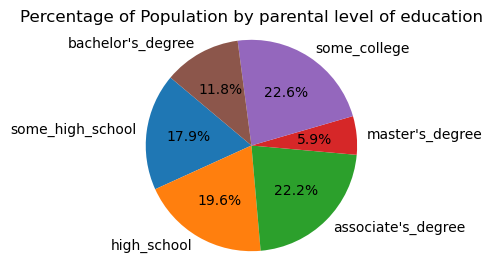

In [9]:
parental_level_of_education = data['parental_level_of_education']
education_percentages = calculate_percentages(parental_level_of_education)

labels = education_percentages.keys()
sizes = education_percentages.values()

plt.figure(figsize=(3, 3))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  
    startangle=140,     
    colors=plt.cm.tab10.colors  
)
plt.title("Percentage of Population by parental level of education")
plt.axis('equal')  
plt.show()

## Comparing Statistics using Barplots

Fixing the math, reading, and writing scores, we aim to identify any factors that may influence these values.

In [10]:
# Help function to fix a factor and obtain statistics on a quantitative variable
def calculate_barplots(columnValue, factor) -> dict:

    unique_values = np.unique(factor)
    sum_dict = {str(value): 0 for value in unique_values}
    count_dict = {str(value): 0 for value in unique_values}

    for index, value in enumerate(factor):
        sum_dict[str(value)] += columnValue[index]
        count_dict[str(value)] += 1
    
    result_dict = {key: sum_dict[key] / count_dict[key] for key in sum_dict.keys()}
    return result_dict

### Average Score by Gender

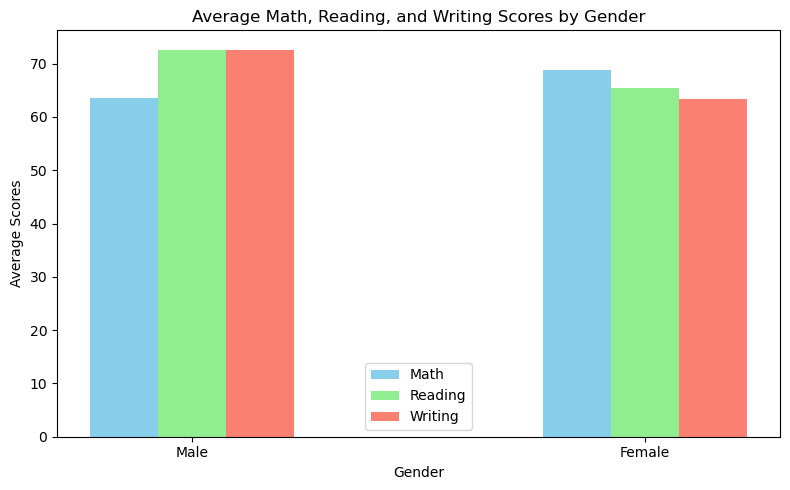

In [16]:
math_scores = data['math_score']
reading_score = data['reading_score']
writing_score = data['writing_score']

average_math_score_gender = calculate_barplots(math_scores.copy(), gender)
average_read_score_gender = calculate_barplots(reading_scores.copy(), gender) 
average_write_score_gender = calculate_barplots(writing_scores.copy(), gender)

categories =  ['Male', 'Female']
math_scores = list(average_math_score_gender.values())
read_scores = list(average_read_score_gender.values())
write_scores = list(average_write_score_gender.values())

x = np.arange(len(categories)) 
width = 0.15  

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - width, math_scores, width, label='Math', color='skyblue')
ax.bar(x, read_scores, width, label='Reading', color='lightgreen')
ax.bar(x + width, write_scores, width, label='Writing', color='salmon')

ax.set_xlabel('Gender')
ax.set_ylabel('Average Scores')
ax.set_title('Average Math, Reading, and Writing Scores by Gender')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

### Impact of test preparation courses on scores

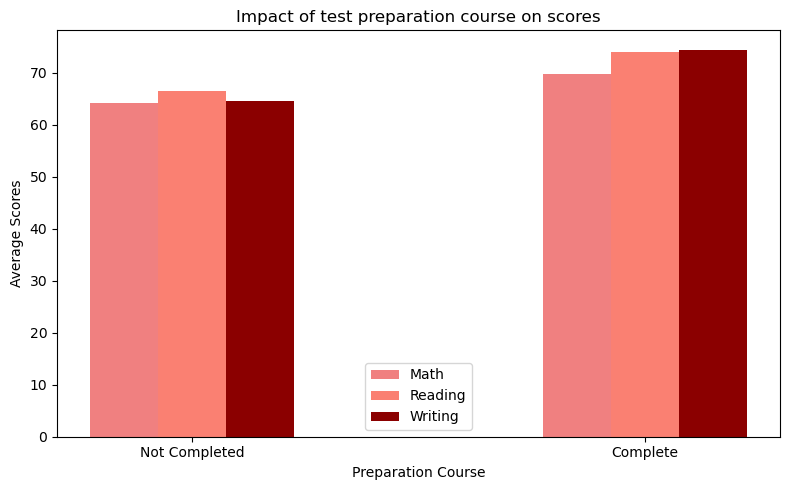

In [23]:
test_preparation_course = data['test_preparation_course']  #(0 = Not completed, 1 = Completed)
math_scores = data['math_score']
reading_score = data['reading_score']
writing_score = data['writing_score']

average_math_score_preparation = calculate_barplots(math_scores.copy(), test_preparation_course)
average_read_score_preparation = calculate_barplots(reading_scores.copy(), test_preparation_course) 
average_write_score_preparation = calculate_barplots(writing_scores.copy(), test_preparation_course)

categories =  ['Not Completed', 'Complete']
math_scores = list(average_math_score_preparation.values())
read_scores = list(average_read_score_preparation.values())
write_scores = list(average_write_score_preparation.values())

x = np.arange(len(categories)) 
width = 0.15  

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - width, math_scores, width, label='Math', color='lightcoral')
ax.bar(x, read_scores, width, label='Reading', color='salmon')
ax.bar(x + width, write_scores, width, label='Writing', color='darkred')

ax.set_xlabel('Preparation Course')
ax.set_ylabel('Average Scores')
ax.set_title('Impact of test preparation course on scores')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

### Average Score by Ethnicity

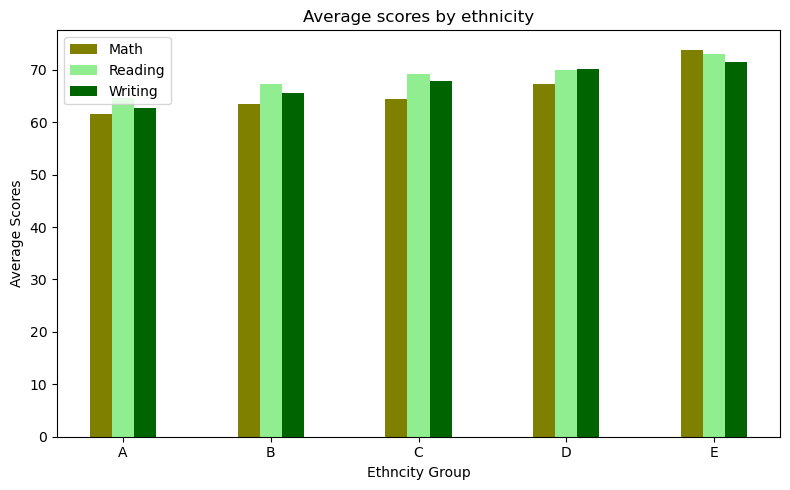

In [27]:
race_ethnicity = data['race_ethnicity']  # race_ethnicity A, B, C, D, E
math_scores = data['math_score']
reading_score = data['reading_score']
writing_score = data['writing_score']

average_math_score_ethnicity = calculate_barplots(math_scores.copy(), race_ethnicity)
average_read_score_ethnicity = calculate_barplots(reading_scores.copy(), race_ethnicity) 
average_write_score_ethnicity = calculate_barplots(writing_scores.copy(), race_ethnicity)

categories =  ['A', 'B', 'C', 'D', 'E']
math_scores = list(average_math_score_ethnicity.values())
read_scores = list(average_read_score_ethnicity.values())
write_scores = list(average_write_score_ethnicity.values())

x = np.arange(len(categories)) 
width = 0.15  

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - width, math_scores, width, label='Math', color='olive')
ax.bar(x, read_scores, width, label='Reading', color='lightgreen')
ax.bar(x + width, write_scores, width, label='Writing', color='darkgreen')

ax.set_xlabel('Ethncity Group')
ax.set_ylabel('Average Scores')
ax.set_title('Average scores by ethnicity')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

### Average Score by Parental Level of Education

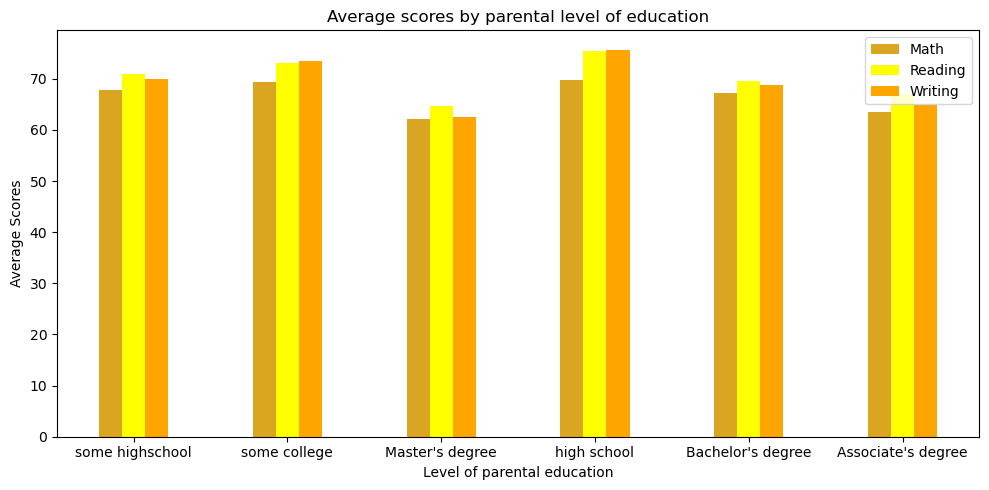

In [31]:
parental_level_of_education = data['parental_level_of_education']   
math_scores = data['math_score']
reading_score = data['reading_score']
writing_score = data['writing_score']

average_math_score_parental = calculate_barplots(math_scores.copy(), parental_level_of_education)
average_read_score_parental = calculate_barplots(reading_scores.copy(), parental_level_of_education) 
average_write_score_parental = calculate_barplots(writing_scores.copy(), parental_level_of_education)

categories =  ["some highschool", "some college", "Master's degree", "high school", "Bachelor's degree", "Associate's degree"]
math_scores = list(average_math_score_parental.values())
read_scores = list(average_read_score_parental.values())
write_scores = list(average_write_score_parental.values())

x = np.arange(len(categories)) 
width = 0.15  

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - width, math_scores, width, label='Math', color='goldenrod')
ax.bar(x, read_scores, width, label='Reading', color='yellow')
ax.bar(x + width, write_scores, width, label='Writing', color='orange')

ax.set_xlabel('Level of parental education')
ax.set_ylabel('Average Scores')
ax.set_title('Average scores by parental level of education')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

## Comparing Statistics using Barplots


### Distribution of Scores by Subject

/tmp/ipykernel_25972/2216717201.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))


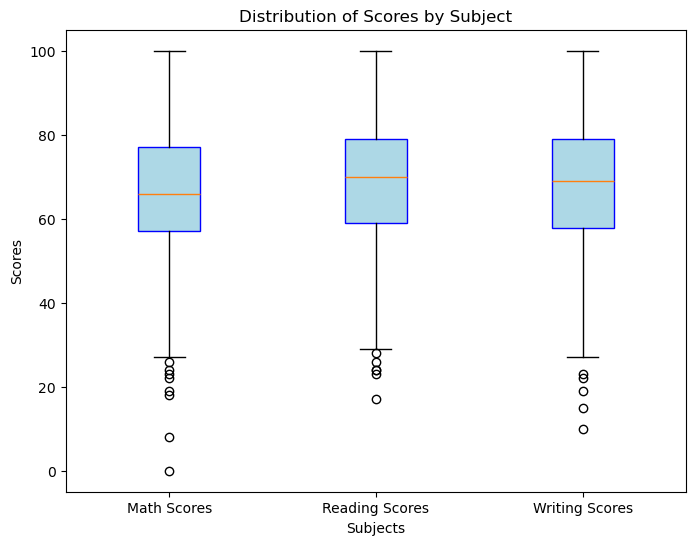

In [32]:
# Extract scores
math_scores = data['math_score']
reading_scores = data['reading_score']
writing_scores = data['writing_score']

# Combine scores into a list for plotting
scores = [math_scores, reading_scores, writing_scores]
labels = ["Math Scores", "Reading Scores", "Writing Scores"]

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(scores, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))

# Add title and labels
plt.title("Distribution of Scores by Subject")
plt.ylabel("Scores")
plt.xlabel("Subjects")

# Show the plot
plt.show()

### Distribution of Scores by Subject and Gender

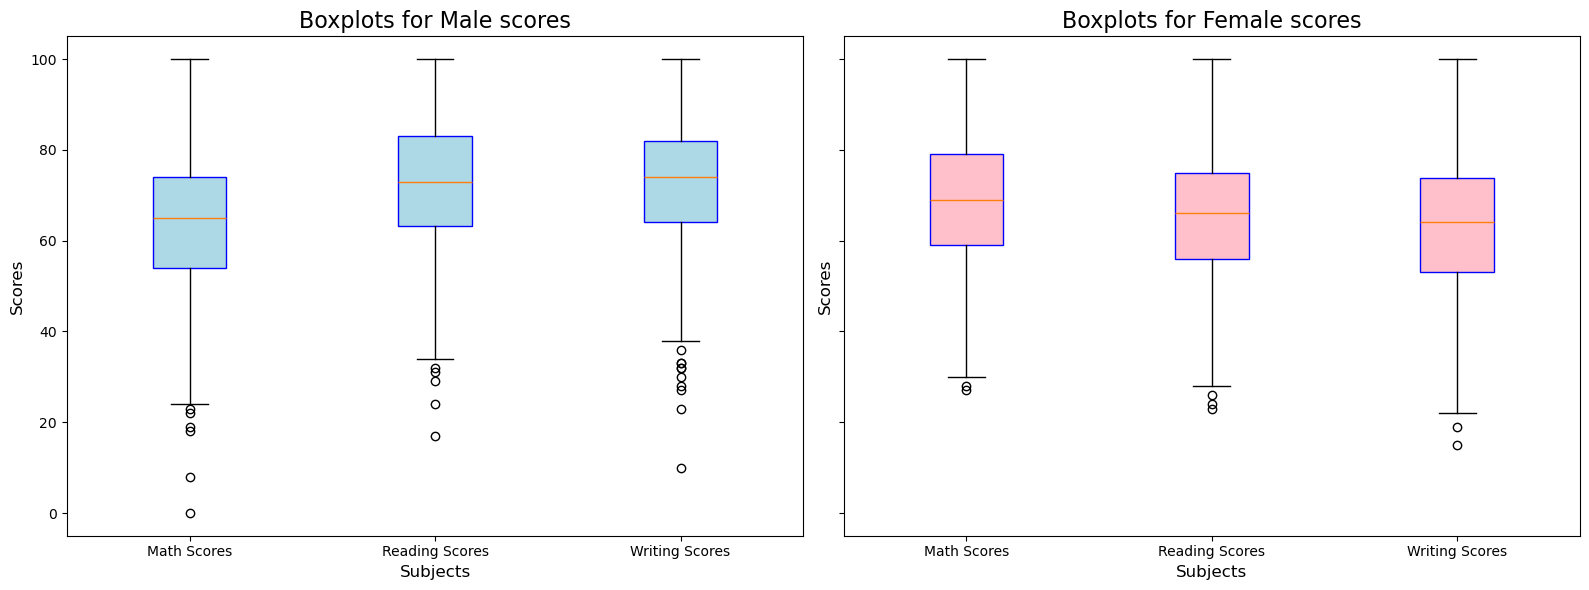

In [77]:
math_scores = data['math_score']
reading_scores = data['reading_score']
writing_scores = data['writing_score']
gender = data["gender"]

list_males = []
list_females = []

for index, value in enumerate(gender):
    if (value == 0.0):
        list_males += [[math_scores[index], reading_scores[index], writing_scores[index]]]
    elif ( value == 1.0 ):
        list_females += [[math_scores[index], reading_scores[index], writing_scores[index]]]


columns_males = list(zip(*list_males))
columns_females = list(zip(*list_females))

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axes[0].boxplot(columns_males, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='blue'))
axes[0].set_title("Boxplots for Male scores", fontsize=16)
axes[0].set_xlabel("Subjects", fontsize=12)
axes[0].set_ylabel("Scores", fontsize=12)
axes[0].set_xticks([1, 2, 3])  
axes[0].set_xticklabels(["Math Scores", "Reading Scores", "Writing Scores"]) 

axes[1].boxplot(columns_females, patch_artist=True, 
                boxprops=dict(facecolor='pink', color='blue'))
axes[1].set_title("Boxplots for Female scores", fontsize=16)
axes[1].set_xlabel("Subjects", fontsize=12)
axes[1].set_ylabel("Scores", fontsize=12)
axes[1].set_xticks([1, 2, 3])  
axes[1].set_xticklabels(["Math Scores", "Reading Scores", "Writing Scores"])

plt.tight_layout()
plt.show()

### Distribution of Scores by Preparation Test Courses

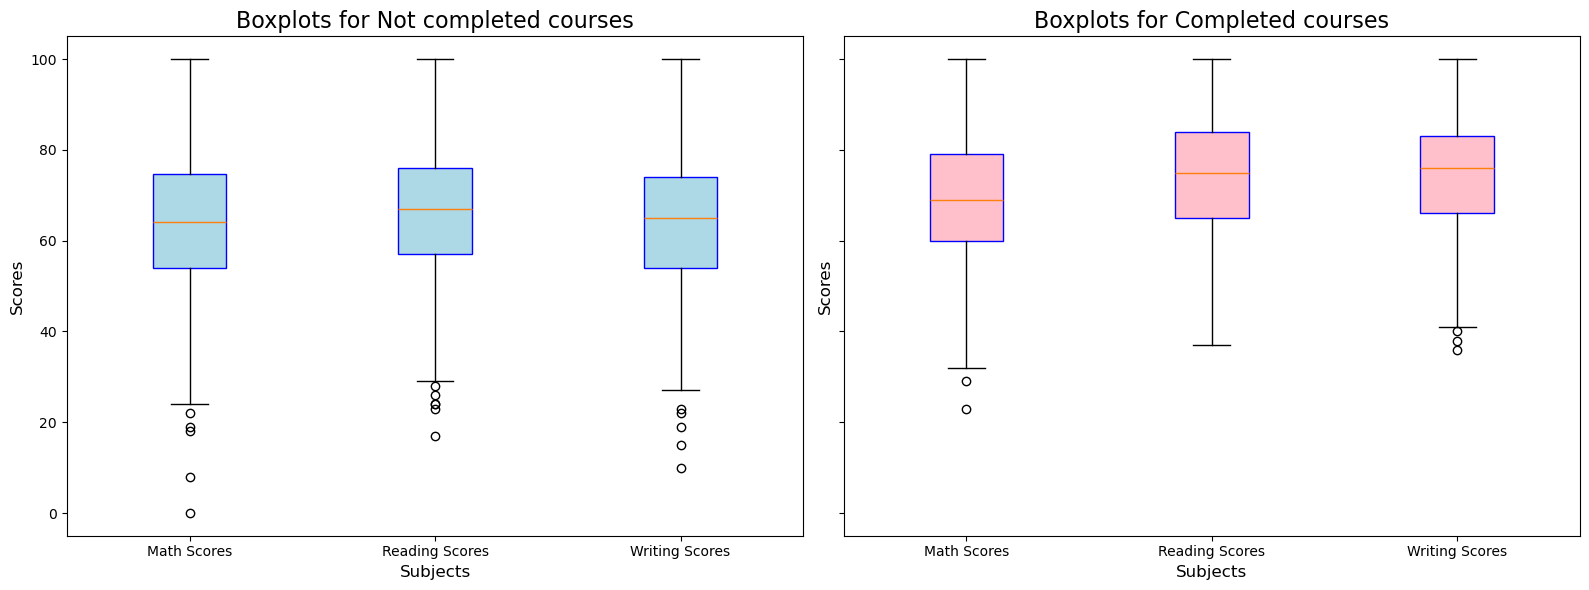

In [78]:
math_scores = data['math_score']
reading_scores = data['reading_score']
writing_scores = data['writing_score']
test_preparation_course = data["test_preparation_course"]

list_zero = []
list_one = []

for index, value in enumerate(test_preparation_course):
    if (value == 0.0):
        list_zero += [[math_scores[index], reading_scores[index], writing_scores[index]]]
    elif ( value == 1.0 ):
        list_one += [[math_scores[index], reading_scores[index], writing_scores[index]]]


columns_zero = list(zip(*list_zero))
columns_ones = list(zip(*list_one))

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axes[0].boxplot(columns_zero, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='blue'))
axes[0].set_title("Boxplots for Not completed courses", fontsize=16)
axes[0].set_xlabel("Subjects", fontsize=12)
axes[0].set_ylabel("Scores", fontsize=12)
axes[0].set_xticks([1, 2, 3])  
axes[0].set_xticklabels(["Math Scores", "Reading Scores", "Writing Scores"]) 

axes[1].boxplot(columns_ones, patch_artist=True, 
                boxprops=dict(facecolor='pink', color='blue'))
axes[1].set_title("Boxplots for Completed courses", fontsize=16)
axes[1].set_xlabel("Subjects", fontsize=12)
axes[1].set_ylabel("Scores", fontsize=12)
axes[1].set_xticks([1, 2, 3])  
axes[1].set_xticklabels(["Math Scores", "Reading Scores", "Writing Scores"])

plt.tight_layout()
plt.show()

## Other Derived Statistics

### Skewness, Curtosis and Iqr

In [80]:
# Extract numerical data
math_scores = data['math_score']
reading_scores = data['reading_score']
writing_scores = data['writing_score']
total_scores = data['total_score']

# Other statistics
print("Other Statistics:")
print(f"Math Scores - Skewness: {Statistics.calculate_skewness(math_scores):.2f}, Kurtosis: {Statistics.calculate_kurtosis(math_scores):.2f}, IQR: {Statistics.calculate_iqr(math_scores)}")
print(f"Reading Scores - Skewness: {Statistics.calculate_skewness(reading_scores):.2f}, Kurtosis: {Statistics.calculate_kurtosis(reading_scores):.2f}, IQR: {Statistics.calculate_iqr(reading_scores)}")
print(f"Writing Scores - Skewness: {Statistics.calculate_skewness(writing_scores):.2f}, Kurtosis: {Statistics.calculate_kurtosis(writing_scores):.2f}, IQR: {Statistics.calculate_iqr(writing_scores)}")
print(f"Total Scores - Skewness: {Statistics.calculate_skewness(total_scores):.2f}, Kurtosis: {Statistics.calculate_kurtosis(total_scores):.2f}, IQR: {Statistics.calculate_iqr(total_scores)}")


Other Statistics:
Math Scores - Skewness: -0.28, Kurtosis: 0.27, IQR: 20.0
Reading Scores - Skewness: -0.26, Kurtosis: -0.07, IQR: 20.0
Writing Scores - Skewness: -0.29, Kurtosis: -0.03, IQR: 21.0
Total Scores - Skewness: -0.30, Kurtosis: 0.13, IQR: 58.0


## Extra

In [6]:
# drawing histogram and frequency count
print(data.draw_histogram(parental_level_of_education))

# magic method to print informations
print(data)

some_high_school | *************************************** (179)
high_school | ******************************************* (196)
associate's_degree | ************************************************* (222)
master's_degree | ************* (59)
some_college | ************************************************** (226)
bachelor's_degree | ************************** (118)

<Statistics(headers=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total_score', 'average_score'])>
